<a href="https://colab.research.google.com/github/tarunchand/Big-Data/blob/main/FIFA18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 49 kB/s 
     |████████████████████████████████| 199 kB 46.3 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845513 sha256=2ee31befba441ef3d0604f75cdf392e5053fcdcf86cbe9e8bc3a977dc70078ce
  Stored in directory: /root/.cache/pip/wheels/42/59/f5/79a5bf931714dcd201b26025347785f087370a10a3329a899c
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession \
 .builder \
 .appName("Python Spark SQL basic example") \
 .config("spark.some.config.option", "some-value") \
 .getOrCreate() 

In [ ]:
fifa_df = spark.read.load("CompleteDataset.csv", format="csv", inferSchema=True,
 header=True)
fifa_df.show()

+---+-----------------+---+--------------------+-----------+--------------------+-------+---------+-------------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|_c0|             Name|Age|               Photo|Nationality|                Flag|Overall|Potential|               Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handling|

In [ ]:
fifa_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Photo: string (nullable = true)
 |-- Nationality: string (nullable = true)
 |-- Flag: string (nullable = true)
 |-- Overall: integer (nullable = true)
 |-- Potential: integer (nullable = true)
 |-- Club: string (nullable = true)
 |-- Club Logo: string (nullable = true)
 |-- Value: string (nullable = true)
 |-- Wage: string (nullable = true)
 |-- Special: integer (nullable = true)
 |-- Acceleration: string (nullable = true)
 |-- Aggression: string (nullable = true)
 |-- Agility: string (nullable = true)
 |-- Balance: string (nullable = true)
 |-- Ball control: string (nullable = true)
 |-- Composure: string (nullable = true)
 |-- Crossing: string (nullable = true)
 |-- Curve: string (nullable = true)
 |-- Dribbling: string (nullable = true)
 |-- Finishing: string (nullable = true)
 |-- Free kick accuracy: string (nullable = true)
 |-- GK diving: string (nullable = true)


In [ ]:
fifa_df.columns

['_c0',
 'Name',
 'Age',
 'Photo',
 'Nationality',
 'Flag',
 'Overall',
 'Potential',
 'Club',
 'Club Logo',
 'Value',
 'Wage',
 'Special',
 'Acceleration',
 'Aggression',
 'Agility',
 'Balance',
 'Ball control',
 'Composure',
 'Crossing',
 'Curve',
 'Dribbling',
 'Finishing',
 'Free kick accuracy',
 'GK diving',
 'GK handling',
 'GK kicking',
 'GK positioning',
 'GK reflexes',
 'Heading accuracy',
 'Interceptions',
 'Jumping',
 'Long passing',
 'Long shots',
 'Marking',
 'Penalties',
 'Positioning',
 'Reactions',
 'Short passing',
 'Shot power',
 'Sliding tackle',
 'Sprint speed',
 'Stamina',
 'Standing tackle',
 'Strength',
 'Vision',
 'Volleys',
 'CAM',
 'CB',
 'CDM',
 'CF',
 'CM',
 'ID',
 'LAM',
 'LB',
 'LCB',
 'LCM',
 'LDM',
 'LF',
 'LM',
 'LS',
 'LW',
 'LWB',
 'Preferred Positions',
 'RAM',
 'RB',
 'RCB',
 'RCM',
 'RDM',
 'RF',
 'RM',
 'RS',
 'RW',
 'RWB',
 'ST']

In [ ]:
fifa_df.count() 

17981

In [ ]:
len (fifa_df.columns)

75

In [ ]:
fifa_df.select('Name', 'Nationality', 'club').show()

+-----------------+-----------+-------------------+
|             Name|Nationality|               club|
+-----------------+-----------+-------------------+
|Cristiano Ronaldo|   Portugal|     Real Madrid CF|
|         L. Messi|  Argentina|       FC Barcelona|
|           Neymar|     Brazil|Paris Saint-Germain|
|        L. Suárez|    Uruguay|       FC Barcelona|
|         M. Neuer|    Germany|   FC Bayern Munich|
|   R. Lewandowski|     Poland|   FC Bayern Munich|
|           De Gea|      Spain|  Manchester United|
|        E. Hazard|    Belgium|            Chelsea|
|         T. Kroos|    Germany|     Real Madrid CF|
|       G. Higuaín|  Argentina|           Juventus|
|     Sergio Ramos|      Spain|     Real Madrid CF|
|     K. De Bruyne|    Belgium|    Manchester City|
|      T. Courtois|    Belgium|            Chelsea|
|       A. Sánchez|      Chile|            Arsenal|
|        L. Modrić|    Croatia|     Real Madrid CF|
|          G. Bale|      Wales|     Real Madrid CF|
|        S. 

In [ ]:
fifa_df.select('Name', 'Long shots').distinct().show()

+-----------------+----------+
|             Name|Long shots|
+-----------------+----------+
|Cristiano Ronaldo|        92|
|      J. Cuadrado|        80|
|      M. Brozović|        79|
|          A. Rami|        58|
|       D. Abraham|        65|
|     Borja Bastón|        73|
|       J. Montero|        68|
|      T. Barnetta|        74|
|          Wallace|        26|
|       A. Barreca|        42|
|    Y. Benalouane|        39|
|          Juankar|        64|
|        D. Appiah|        38|
|   Rafael Martins|        69|
|          Granell|        77|
|     A. Cornelius|        68|
|         J. Henry|        75|
|        M. Ozdoev|        69|
|            Fábio|        58|
|       T. Dingomé|        60|
+-----------------+----------+
only showing top 20 rows



In [ ]:
fifa_df.filter(fifa_df['age'] > 21).show()

+---+-----------------+---+--------------------+-----------+--------------------+-------+---------+-------------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|_c0|             Name|Age|               Photo|Nationality|                Flag|Overall|Potential|               Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handling|

In [ ]:
fifa_df.groupBy('age').count().show()

+---+-----+
|age|count|
+---+-----+
| 31|  671|
| 34|  272|
| 28| 1051|
| 26| 1202|
| 27| 1152|
| 44|    2|
| 22| 1324|
| 16|   13|
| 20| 1245|
| 40|    8|
| 19| 1069|
| 41|    3|
| 37|   69|
| 17|  258|
| 35|  191|
| 39|   20|
| 23| 1394|
| 38|   36|
| 25| 1522|
| 24| 1334|
+---+-----+
only showing top 20 rows



In [ ]:
fifa_df.createOrReplaceTempView('FifaView')

In [ ]:
sqlDF = spark.sql('Select * from FifaView')

In [ ]:
sqlDF.show()

+---+-----------------+---+--------------------+-----------+--------------------+-------+---------+-------------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|_c0|             Name|Age|               Photo|Nationality|                Flag|Overall|Potential|               Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handling|

In [ ]:
sqlDF = spark.sql('Select age, count(*) as count from FifaView group by age')
sqlDF.show()

+---+-----+
|age|count|
+---+-----+
| 31|  671|
| 34|  272|
| 28| 1051|
| 26| 1202|
| 27| 1152|
| 44|    2|
| 22| 1324|
| 16|   13|
| 20| 1245|
| 40|    8|
| 19| 1069|
| 41|    3|
| 37|   69|
| 17|  258|
| 35|  191|
| 39|   20|
| 23| 1394|
| 38|   36|
| 25| 1522|
| 24| 1334|
+---+-----+
only showing top 20 rows



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
pandas_df = sqlDF.toPandas()

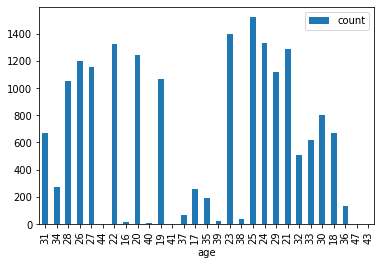

In [ ]:
pandas_df.plot(x = 'age', y='count', kind='bar')

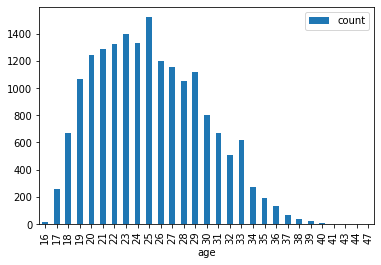

In [ ]:
pandas_df.sort_values(by='age', ascending=True).plot(x='age', y='count', kind='bar')

In [ ]:
spark.sql('Select club, count(*) FROM FifaView group by club').show()

+--------------------+--------+
|                club|count(1)|
+--------------------+--------+
|             Palermo|      28|
|         Yeovil Town|      21|
|  1. FC Union Berlin|      27|
|  Santiago Wanderers|      20|
|               Carpi|      30|
|Evkur Yeni Malaty...|      30|
|          Sagan Tosu|      25|
|            FC Basel|      25|
|  Argentinos Juniors|      28|
|       Karlsruher SC|      27|
|  Lorca Deportiva CF|      29|
|     SC Paderborn 07|      28|
|     Cheltenham Town|      28|
|San Lorenzo de Al...|      28|
|         SC Freiburg|      32|
|  SpVgg Unterhaching|      28|
|Atletico Nacional...|      28|
|Universidad Católica|      20|
|         GFC Ajaccio|      25|
|           FC Luzern|      27|
+--------------------+--------+
only showing top 20 rows



In [ ]:
sqlDF=spark.sql("Select club, count(*) from FifaView group by club having count(*) > 33")

In [ ]:
sqlDF.show()

+------------------+--------+
|              club|count(1)|
+------------------+--------+
| Manchester United|      34|
|     UD Las Palmas|      34|
|              null|     248|
|Olympique Lyonnais|      34|
|     VfL Wolfsburg|      34|
|          OGC Nice|      34|
|     Villarreal CF|      35|
|         FC Nantes|      34|
| Borussia Dortmund|      34|
+------------------+--------+



In [ ]:
pandas_df = sqlDF.toPandas()

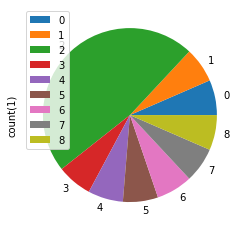

In [ ]:
pandas_df.plot(x='club', y='count(1)', kind='pie')